Modified from plot-clicks-per-query.ipynb 

Count number of clicks per individual query (CPQ), then plot histograms of CPQ for each model.

need to fix: this is skipping lines so missing half the data

In [8]:
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import datetime
import numpy as np
import sys


def get_cpq_old():
    cpq_lsi = [] # clicks per query
    cpq_lda = []

    # read 2 lines at a time
    with open("all_clicks.txt") as f:
        while True:
            lines = [] # cache 2 lines at a time but loop thru all lines
            for i in range(2):
                try:
                    lines.append(next(f)) # append next line in file
                except StopIteration: # if we reach end of file before finding 2 more lines 
                    return
            tokens1 = lines[0].split(' ')
            model = tokens1[0]
            query_start = np.datetime64(tokens1[1]+" "+tokens1[2])
        
            tokens2 = lines[1].split(' ')
            query_end = np.datetime64(tokens2[1]+" "+tokens2[2])
        
            if( model == 'LSI'):
                curr_num_clicks = 0
                with open("lsi_clicks.txt") as fm:
                    for line in fm.readlines():
                        if '2017' in line:
                            if np.datetime64(line) >= query_start and np.datetime64(line) < query_end:
                                curr_num_clicks += 1
                cpq_lsi.append(curr_num_clicks)                
                    
            if( model == 'LDA'):
                curr_num_clicks = 0
                with open("lda_clicks.txt") as fm:
                    for line in fm.readlines():
                        if '2017' in line:
                            if np.datetime64(line) >= query_start and np.datetime64(line) < query_end:
                                curr_num_clicks += 1
                cpq_lda.append(curr_num_clicks) 
    return(cpq_lsi, cpq_lda) 

def get_cpq():
    cpq_lsi = [] # clicks per query
    cpq_lda = []

    # first save all lines
    with open("all_clicks.txt") as f:
        lines = f.readlines() 
        # now read 2 lines at at time
        for i in range(len(lines)-1):
            tokens1 = lines[i].split(' ')
            model = tokens1[0]
            query_start = np.datetime64(tokens1[1]+" "+tokens1[2])
        
            tokens2 = lines[i+1].split(' ')
            query_end = np.datetime64(tokens2[1]+" "+tokens2[2])
        
            if( model == 'LSI'):
                curr_num_clicks = 0
                with open("lsi_clicks.txt") as fm:
                    for line in fm.readlines():
                        if '2017' in line:
                            if np.datetime64(line) >= query_start and np.datetime64(line) < query_end:
                                curr_num_clicks += 1
                cpq_lsi.append(curr_num_clicks)                
                    
            if( model == 'LDA'):
                curr_num_clicks = 0
                with open("lda_clicks.txt") as fm:
                    for line in fm.readlines():
                        if '2017' in line:
                            if np.datetime64(line) >= query_start and np.datetime64(line) < query_end:
                                curr_num_clicks += 1
                cpq_lda.append(curr_num_clicks) 
    return(cpq_lsi, cpq_lda)    

In [9]:
cpq_lsi, cpq_lda = get_cpq()

C:\Users\melanie\Anaconda3\envs\cdips2017\lib\site-packages\ipykernel_launcher.py:68: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
C:\Users\melanie\Anaconda3\envs\cdips2017\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


In [10]:
cpq_lsi

[4,
 4,
 4,
 4,
 4,
 5,
 5,
 2,
 4,
 4,
 5,
 4,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1]

In [11]:
cpq_lda

[3,
 3,
 0,
 3,
 4,
 4,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

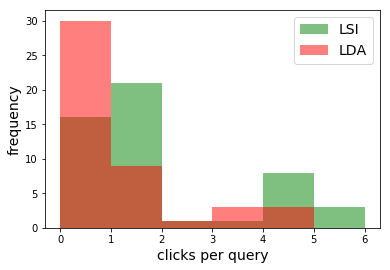

In [12]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.hist(cpq_lsi, bins=[0,1,2,3,4,5,6], color='g', alpha=0.5, label='LSI');
plt.hist(cpq_lda, bins=[0,1,2,3,4,5,6], color='r', alpha=0.5, label='LDA');
plt.xlabel('clicks per query', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.legend(fontsize=14)